In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.scripts.script_summarize_weights as csw
import matplotlib.pyplot as plt
import seaborn as sb    
import scipy.stats as stats
import Functional_Fusion.atlas_map as at # from functional fusion module
import Functional_Fusion.dataset as fdata # from functional fusion module
import Functional_Fusion.matrix as fm
import nibabel as nb
import nitools as nt
fig_dir =  '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts'

In [2]:
def plot_figure(T,label_colors): 
    plt.figure(figsize=(6,6))
    sb.scatterplot(T,x='cort_size',y='cereb_size',color=label_colors,s=100)
    sb.despine()
    for x,y,label in zip(T.cort_size,T.cereb_size,T.name):
        plt.text(x,y,label,va='bottom',ha='left')
    ax=plt.gca()
    ax.set_xlabel('Percent of neocortex')
    ax.set_ylabel('Percent of cerebellum')
    ax.set_xlim([0,11])
    ax.set_ylim([0,15])
    plt.plot([0,11],[0,11],'k-')


##  Buckner vs. Yeo 7/17 region sizes (winner take all)

In [3]:
cortical_roi = "yeo17"
cereb_roi = "Buckner17"
# Get the cortical labels from the gifti file 
cort_label = []
for i,h in enumerate(["L","R"]):
    lname = gl.atlas_dir + f"/tpl-fs32k/{cortical_roi}.{h}.label.gii"
    gii = nb.load(lname)
    cort_label.append(gii.agg_data())
label_names = nt.get_gifti_labels(gii)
label_colors,cmap = nt.get_gifti_colortable(gii)
cort_label = np.concatenate(cort_label,axis=0)
# Get the cerebellar labels from the nifti file
lname = gl.atlas_dir + f"/tpl-SUIT/atl-{cereb_roi}_space-SUIT_dseg.nii"
nii = nb.load(lname)
cereb_label = nii.get_fdata()

# Build the table
K =cereb_label.max().astype(int)
cereb_size= np.zeros((K,))
cort_size= np.zeros((K,))
for k in range(K):
    cereb_size[k] = np.sum(cereb_label==k+1)
    cort_size[k]  = np.sum(cort_label==k+1)
cereb_size = cereb_size/np.sum(cereb_size)*100
cort_size = cort_size/np.sum(cort_size)*100

T={'name':label_names[1:],
    'cort_size':cort_size,
    'cereb_size':cereb_size}
T=pd.DataFrame(T)
label_colors = label_colors[1:,:]

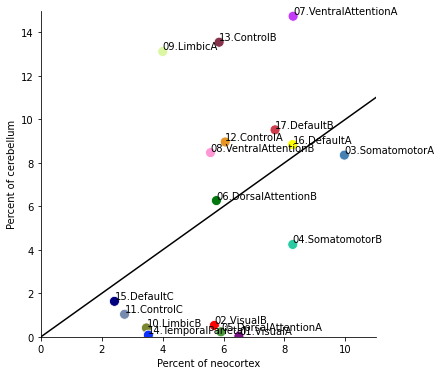

In [4]:
plot_figure(T,label_colors)

## Yeo 17 based on connectivty weights

In [5]:
T1,colors1 = csw.get_weight_by_cortex(dataset_name='Fusion',extension='06')

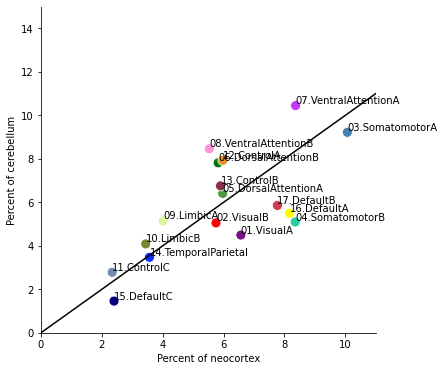

In [6]:
plot_figure(T1,colors1)

In [8]:
T2,colors = csw.get_weight_by_cortex(dataset_name='HCP',extension='A-2')

In [10]:
plot_figure(T2,colors)

,cort_size,cereb_size,name
0,6.567403,NaN,01.VisualA
1,5.751376,NaN,02.VisualB
2,10.066611,NaN,03.SomatomotorA
3,8.354486,NaN,04.SomatomotorB
4,5.971141,NaN,05.DorsalAttentionA
5,5.821224,NaN,06.DorsalAttentionB
6,8.366412,NaN,07.VentralAttentionA
7,5.529907,NaN,08.VentralAttentionB
8,4.015401,NaN,09.LimbicA
9,3.442989,NaN,10.LimbicB
